In [1]:
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout , Input
from tensorflow.keras.optimizers import Adam

In [2]:
from sklearn.datasets import make_moons
X , y = make_moons(n_samples = 100 , noise = 0.25 , random_state = 42)

In [4]:
X

array([[ 1.67746885, -0.58182293],
       [ 0.13745149,  0.63475669],
       [ 0.76836917, -0.30940669],
       [-1.19137866,  0.22565763],
       [-0.58182043,  0.03413363],
       [-0.56391227,  1.02973965],
       [ 0.27407116,  0.56610994],
       [ 1.42707636, -0.45874816],
       [ 0.91836231,  0.78214112],
       [ 0.80507453, -0.21097409],
       [ 0.36714988,  0.67302321],
       [-0.30774278,  0.91011311],
       [ 1.56235903, -0.75165184],
       [-0.71390452,  0.96112853],
       [ 2.05626438,  0.52627159],
       [ 1.37302499,  0.45958785],
       [ 1.16928784, -0.27122152],
       [ 1.00701939, -0.56622326],
       [ 0.34774329,  0.63847067],
       [-0.16412302,  0.86198951],
       [-0.14256648,  0.09494725],
       [ 1.94246677, -0.21216955],
       [ 0.11645728,  0.66754806],
       [-1.11854511,  0.30722293],
       [ 0.32714727,  0.29744743],
       [ 0.29805021,  1.04889334],
       [-1.00460326,  0.41708803],
       [ 2.05688986, -0.05578786],
       [ 0.67240353,

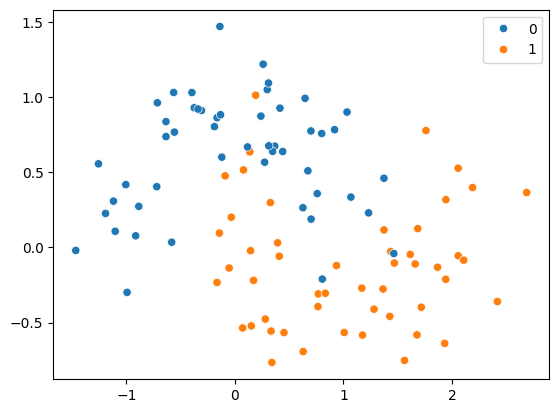

In [5]:
plt.figure()
sns.scatterplot(x = X[ : , 0] , y = X[ : , 1] , hue = y)
plt.legend()
plt.show()

### model without Regularization

In [6]:
model1 = Sequential()

model1.add(Input(shape = (2 , ))) # input layer
model1.add(Dense(128 , activation = 'relu')) # hidden layer-1
model1.add(Dense(1 , activation = 'sigmoid')) # output layer

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model1.compile(loss = 'binary_crossentropy' , optimizer = Adam(learning_rate = 0.01) , metrics = ['accuracy'])

In [9]:
history1 = model1.fit(X , y , validation_split = 0.2 , epochs = 2000 , verbose = False)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


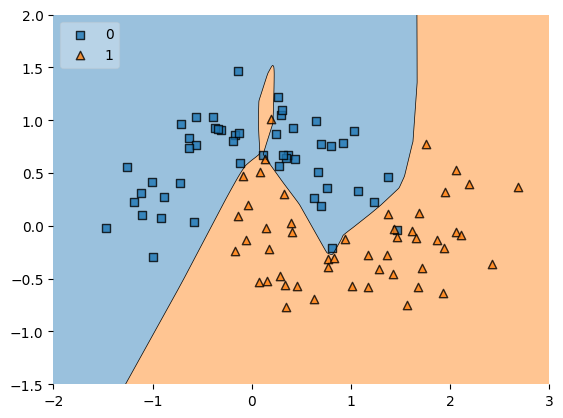

In [10]:
plot_decision_regions(X , y.astype('int') , clf = model1 , legend = 2)
plt.xlim(-2 , 3)
plt.ylim(-1.5 , 2)
plt.show()

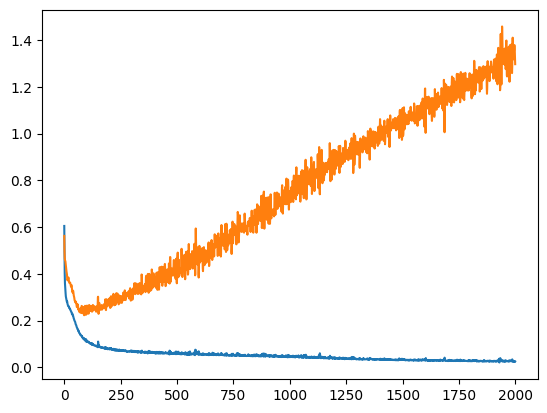

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()

### Model with L2 regularization

In [12]:
from tensorflow.keras.regularizers import l2

model2 = Sequential()

model2.add(Input(shape = (2 , ))) # input layer
model2.add(Dense(128 , activation = 'relu' , kernel_regularizer = l2(0.03))) # hidden layer-1
model2.add(Dense(1 , activation = 'sigmoid')) # output layer

In [13]:
model2.compile(loss = 'binary_crossentropy' , optimizer = Adam(learning_rate = 0.01) , metrics= ['accuracy'])

In [14]:
history2 = model2.fit(X , y , epochs = 1500 , verbose = False , validation_split = 0.2)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


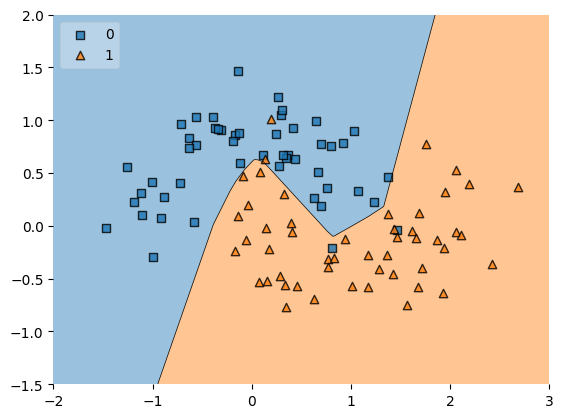

In [15]:
plot_decision_regions(X , y.astype('int') , clf = model2 , legend = 2)
plt.xlim(-2 , 3)
plt.ylim(-1.5 , 2)
plt.show()

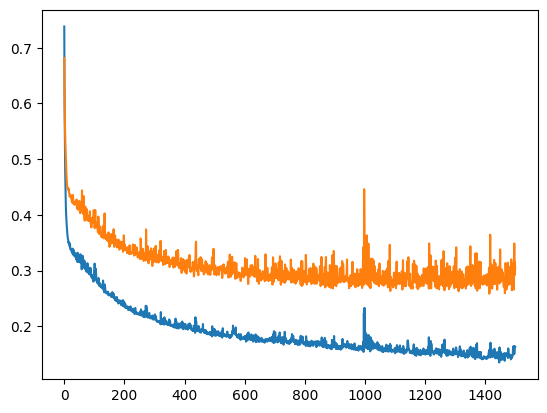

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()